# **Deep Learning Models**
This Jupyter Notebook provides a comprehensive guide to building predictive models for store sales data, employing a variety of machine learning and deep learning techniques. It is designed to take the reader through a detailed journey of data science, covering essential steps such as data preprocessing, exploratory data analysis (EDA), feature engineering, model training, evaluation, and visualization. Each section is crafted to ensure a thorough understanding and application of different methods, making it an invaluable resource for anyone looking to enhance their predictive modeling skills.<br>n
The goal of this project is to develop accurate predictive models that can forecast store sales. By leveraging historical sales data, additional features, and advanced analytical techniques, we aim to uncover patterns and insights that drive sales performance. This can help in making informed business decisions, optimizing inventory management, and enhancing promotional strategies.

# *Table of Contents:*
1- Importing Modules.<br>
2- Importing Datasets.<br>
3- Handling Missing Values.<br>
4- Merging Datasets.<br>
5- Splitting Date Column.<br>
6- Outlier Detection and Abnormalities.<br>
7- Data Visualizations.<br>
8- One-Hot Encoding.<br>
9- Data Normalization.<br>
10- Correlation Matrix.<br>
11- Recursive Feature Elimination.<br>
12- Data Splitting.<br>
13- XGBoost Model.<br>
14- Custom Deep Learning Neural Network.<br>

# *<ins>Importing Modules:</ins>*

This part imports essential libraries that facilitate data manipulation, visualization, statistical analysis, machine learning, and deep learning. Libraries like numpy and pandas are used for data handling, matplotlib and seaborn for visualization, scipy and statsmodels for statistical analysis, sklearn for machine learning models, xgboost for boosting algorithms, keras for building neural networks, and additional libraries for utility functions.ing workflows.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# *<ins>Importing Datasets:</ins>*

The datasets train.csv, stores.csv, and features.csv are loaded into pandas DataFrames. These files contain the historical sales data, store information, and additional features like markdowns, CPI, and unemployment rates, respectively. Proper loading and initial inspection of these datasets are crucial for understanding the data structure and content.

The Walmart Sales Forecasting dataset on Kaggle provides historical sales data for 45 Walmart stores across different regions. Each store contains several departments, and the task is to predict department-wide sales for each store. The dataset includes features such as store, department, date, weekly sales, and additional variables like promotional markdowns and holidays that might impact sales.

This dataset is particularly useful for time-series forecasting and machine learning models aimed at sales prediction. It is often used in competitions to build and evaluate predictive models. The data is well-suited for methods like regression, decision trees, and deep learning algorithms.

In [2]:
data = pd.read_csv('C:/Users/moham/Desktop/train.csv')
stores = pd.read_csv('C:/Users/moham/Desktop/stores.csv')
features = pd.read_csv('C:/Users/moham/Desktop/features.csv')

**Training Dataset file**

In [3]:
data.info()
print("------------------------------------------------")
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,9/28/2012,508.37,False
421566,45,98,10/5/2012,628.10,False
421567,45,98,10/12/2012,1061.02,False
421568,45,98,10/19/2012,760.01,False
421569,45,98,10/26/2012,1076.80,False


**Stores Dataset file**

In [4]:
stores.info()
print("------------------------------------------------")
stores.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
------------------------------------------------


,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


**feature dataset file**

In [5]:
features.info()
print("------------------------------------------------")
features.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,7/26/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


# *<ins>Handling missing values of features dataset:</ins>*

##### the `CPI` and `Unemployment` columns have their missing values filled with median values to avoid skewing the data.

In [6]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

The for loop iterates over the columns labeled `MarkDown1` through `MarkDown5` in the DataFrame `features`.
##### it replace negative and missing values with 0.

In [7]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# *<ins>Merging Training Dataset and merged stores-features Dataset:</ins>*

The merging is done on common columns like Store and Date, and the resultant DataFrame is sorted by date for temporal analysis. This step also standardizes the IsHoliday column to ensure consistency across datasets.

##### Merges the `DataFrame data` with the `DataFrame stores` based on the `Store` column, using a left join.

In [9]:
data = pd.merge(data,stores,on='Store',how='left')

##### Merges the `DataFrame data` with the `DataFrame features` based on the `Store` and `Date` columns, using a left join.

In [10]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

##### Converts the `Date` column in the `DataFrame data` to datetime format.

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

##### Sorts the `DataFrame data` based on the `Date` column in ascending order.

In [12]:
data.sort_values(by=['Date'],inplace=True)

##### Sets the index of the `DataFrame data` to the `Date` column.

In [13]:
data.set_index(data.Date, inplace=True)

##### Checks if all values in the `IsHoliday_x` column of `data` are present in the `IsHoliday_y` column.

In [14]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

##### Drops the `IsHoliday_x` column from the `DataFrame data`, Renames the `IsHoliday_y` column to `IsHoliday` in the `DataFrame data`.

In [15]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()
print("------------------------------------------------")
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# *<ins>Splitting Date Column:</ins>*

Temporal features are extracted from the `Date` column, adding `Year`, `Month`, and `Week` as new columns. These features help capture `seasonal and time-related patterns` in the sales data, which are crucial for time series forecasting.

In [16]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
data.head()

-----------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\moham\AppData\Local\Temp\ipykernel_45496\591058732.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


# *<ins>Outlier Detection and Abnormalities:</ins>*

**Outliers**

- This section calculates `aggregate statistics` for `Weekly_Sales`,<br>
- `merges them with the main dataset`, <br>
- `Outliers are identified and removed based on z-scores`,<br> 
- `negative sales values are handled appropriately` to maintain data integrity.

--------------------------------------------------------------------------
- Groups the `DataFrame data` by `Store` and `Dept`,<br>
- calculates the maximum, minimum, mean, median, and standard deviation of `Weekly_Sales`, and resets the index.<br>
- Counts the number of missing values in each column of `agg_data`.

In [17]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

------------------------------------------
- Merges data with `agg_data` based on `Store` and `Dept` using a left join.<br>
- Drops rows with missing values from store_data.<br>
- Copies `store_data` to `data`.<br>
- Deletes the `store_data DataFrame` from memory.

In [18]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

-------------------------------------------------
- Converts the `Date` column in data to `datetime format`.<br>
- `Sorts data` based on the `Date` column in ascending order.<br>
- `Sets the index` of data to the `Date` column.<br>
- `Displays` the first few rows of the `DataFrame data`.

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


- `Calculates` the `total markdown` by `summing up` values from `MarkDown1` to `MarkDown5` and assigns the result to a new column `Total_MarkDown`.<br>
- `Drops` the columns `MarkDown1` through `MarkDown5` from the `DataFrame data`.

In [20]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

- Defines a list of column names containing numeric data.<br>
- Creates a new `DataFrame data_numeric` containing only the columns specified in `numeric_col`.<br>
- Returns the shape (number of rows and columns) of the DataFrame data.

In [21]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()
data.shape

(421533, 20)

- Filters out rows from data where the absolute z-score of each numeric column in data_numeric is less than 2.5.<br>
- Returns the new shape (number of rows and columns) of the DataFrame data after filtering.

In [22]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

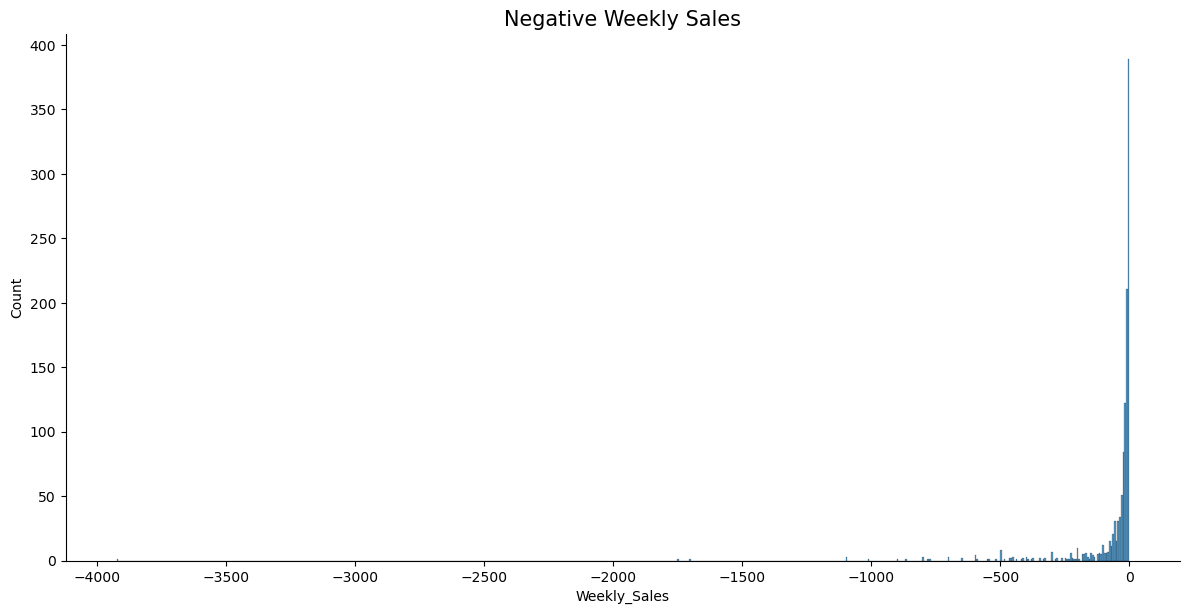

In [23]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [24]:
data=data[data['Weekly_Sales']>=0]
data.shape

(374247, 20)

In [25]:
data['IsHoliday'] = data['IsHoliday'].astype('int')
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [26]:
data.to_csv('C:/Users/moham/Desktop/dataset/preprocessed_walmart_dataset.csv')

# *<ins>Data Visuallizations:</ins>*

Visualizations play a vital role in understanding data distributions and relationships. Various plots such as bar plots, line plots, distribution plots, pie charts, and seasonal decomposition plots are created to explore trends, seasonal effects, and relationships between sales and other features. These visual insights guide feature engineering and model selection processes.

**Average Monthly Sales**

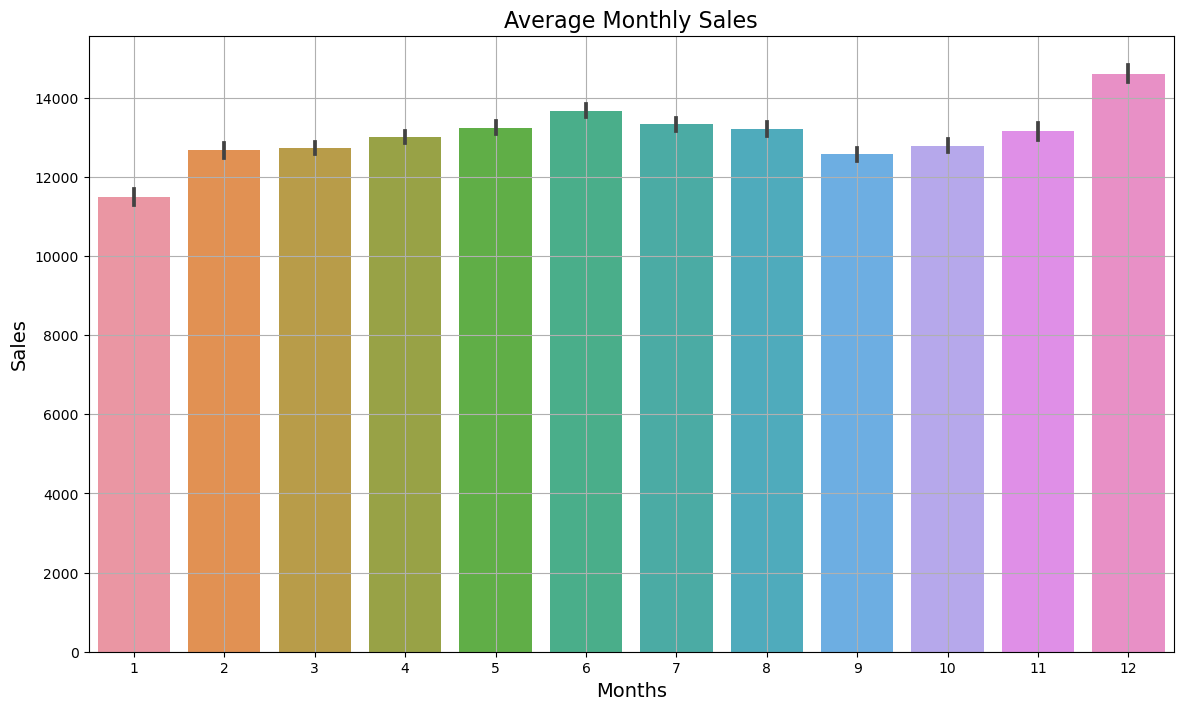

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [28]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


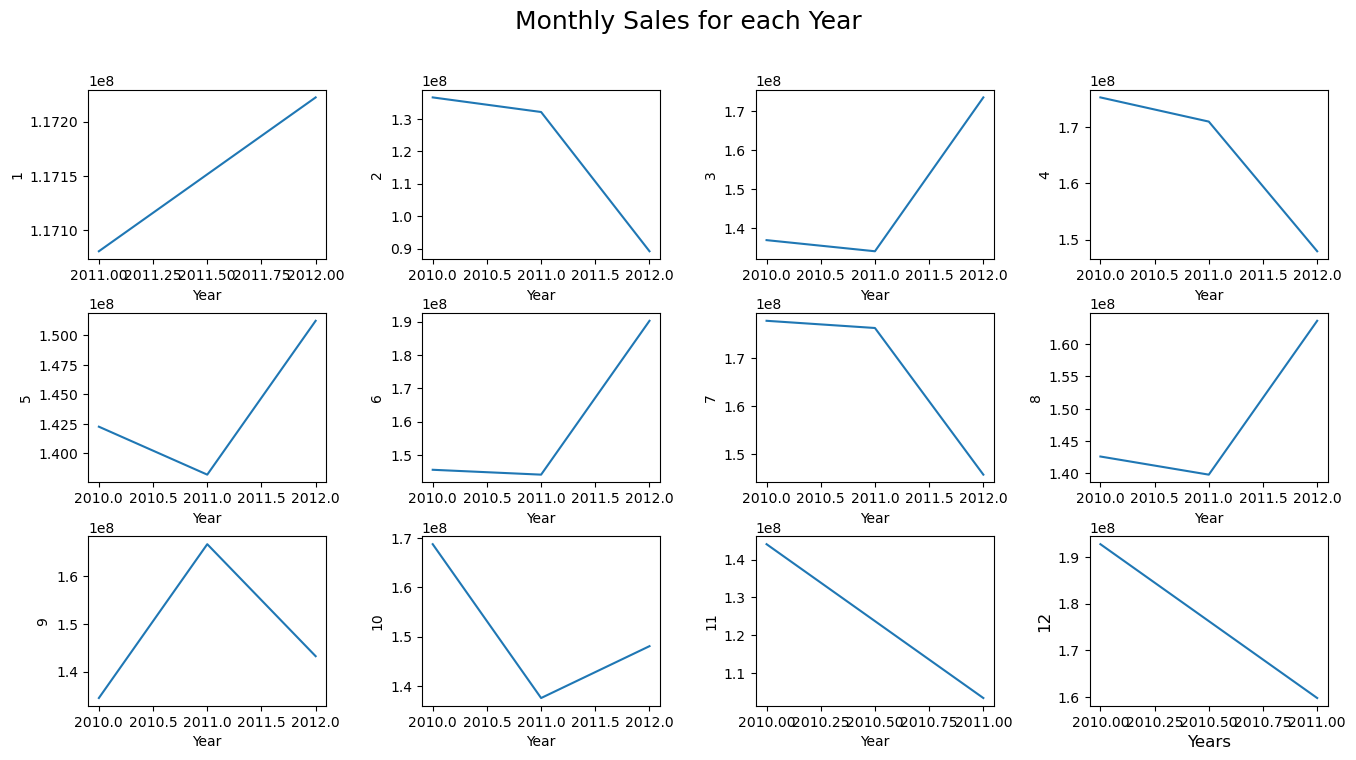

In [29]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

**Average Weekly Sales Store wise**

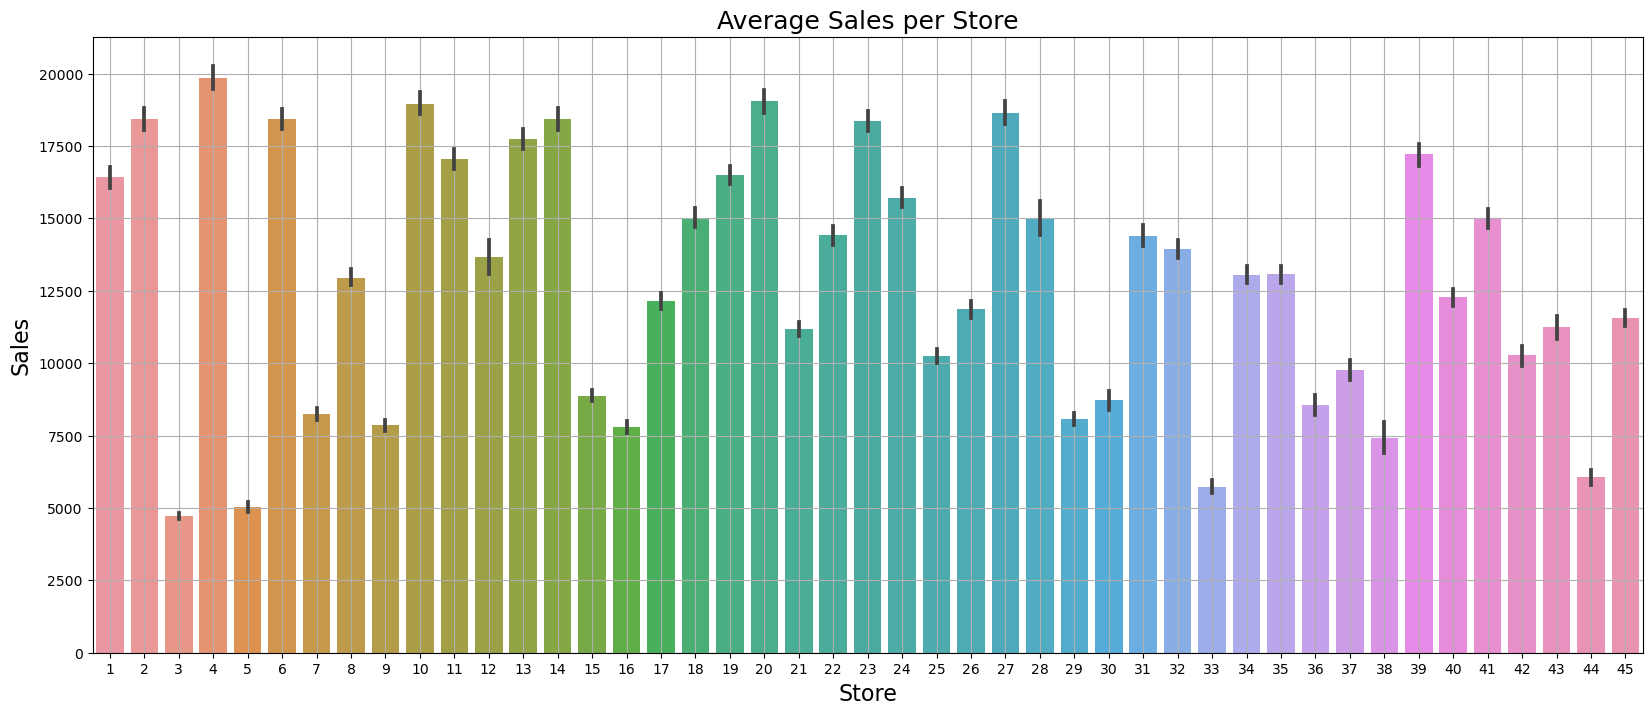

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

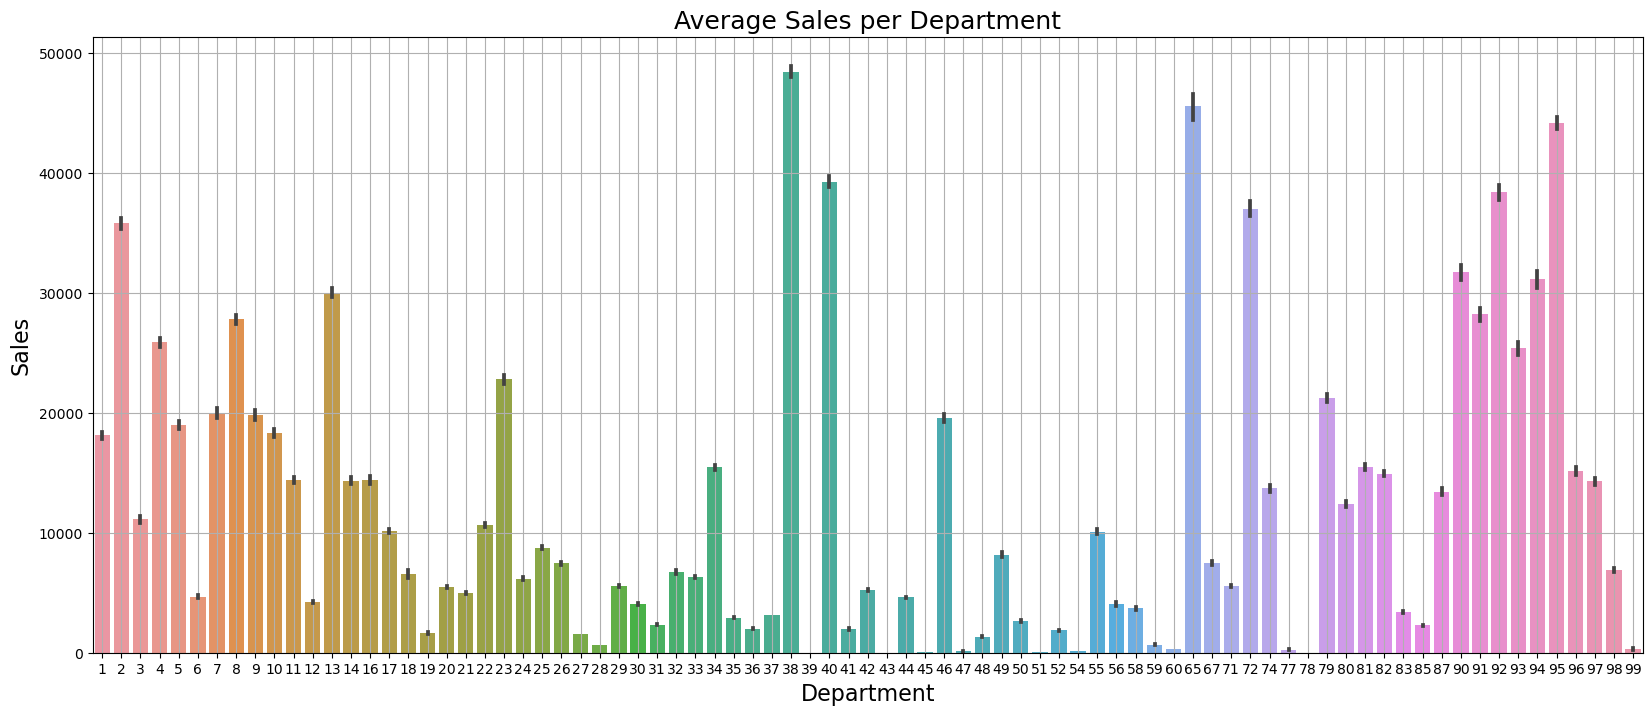

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

**Sales Vs Temperature**

C:\Users\moham\AppData\Local\Temp\ipykernel_45496\1231431672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


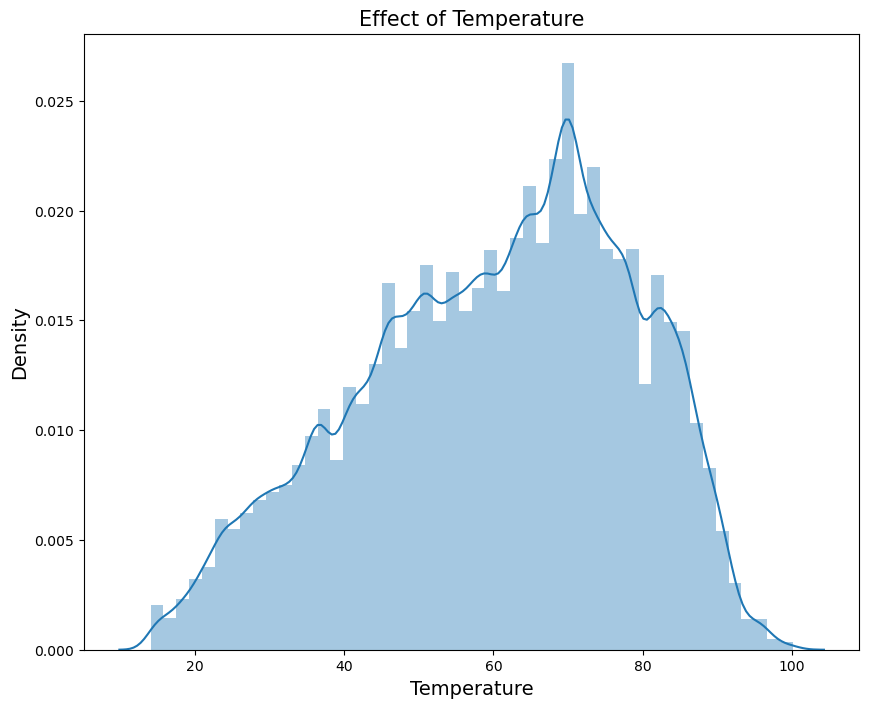

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

**Holiday Distribution**

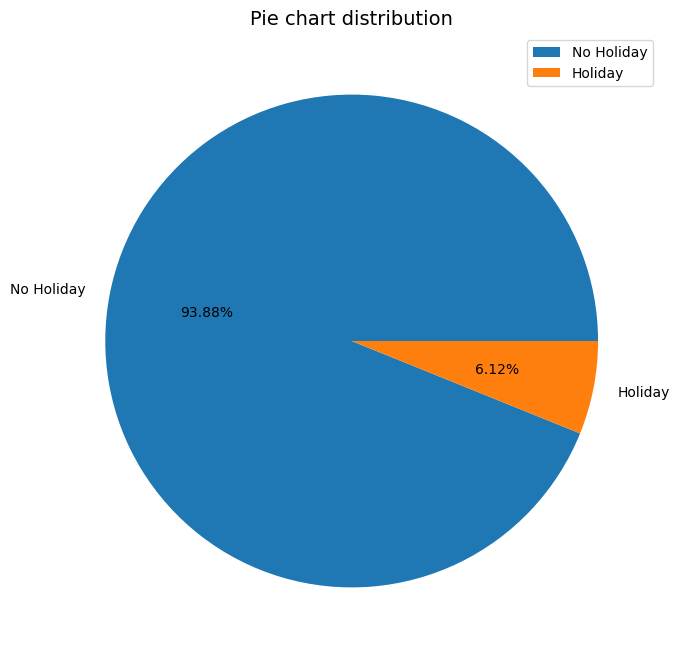

In [33]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

#**Time Series Decompose**

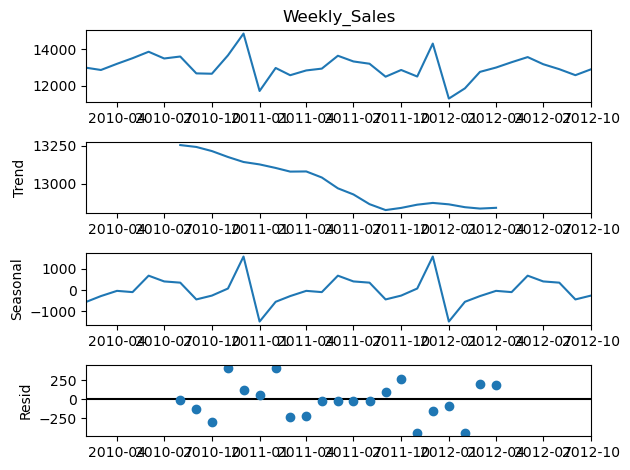

In [34]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

# *<ins>One-hot-encoding:</ins>*

Categorical variables like `Store`, `Dept`, and `Type` are transformed into a numerical format using one-hot encoding. This step is necessary for algorithms that `require numerical input` and helps in capturing categorical differences effectively.

- `Defines a list` of column names containing `categorical data`.<br>
- `Creates` a new `DataFrame data_cat` containing only the columns specified in `cat_col`.<br>
- Displays the last few rows of the `DataFrame data_cat`.

In [35]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


Converts categorical variables into dummy/indicator variables using one-hot encoding.
Displays the first few rows of the DataFrame data_cat after one-hot encoding.

In [36]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
data.shape

(374247, 20)

Concatenates the original DataFrame data with the one-hot encoded DataFrame data_cat along the columns (axis=1).

In [38]:
data = pd.concat([data, data_cat],axis=1)
data.shape

(374247, 149)

Drops the categorical columns specified in cat_col from the DataFrame data in place.

In [39]:
data.drop(columns=cat_col,inplace=True)

Drops the 'Date' column from the DataFrame data in place.

In [40]:
data.drop(columns=['Date'],inplace=True)
data.shape

(374247, 145)

# *<ins>Data Normalization:</ins>*

Normalization scales numerical features to a consistent range, which is particularly important for models sensitive to feature scales. Min-Max scaling is applied to selected numerical columns, ensuring features contribute equally to the model training process.lar scales.

Defines a list of column names containing numerical data.

In [41]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

Initializes a MinMaxScaler object for scaling numerical data between a specified feature range (0 and 1).<br>
Defines a function named 'normalization' that takes a DataFrame (df) and a list of column names (col) as input parameters.<br>
Initiates a loop iterating over each column name in the list col<br>
Retrieves the values of the current column i from the DataFrame df.<br>
Converts the values of the current column into a numpy array.<br>
Applies Min-Max scaling to the values of the current column and assigns the scaled values back to the DataFrame df.<br>
Returns the modified DataFrame df after normalization.<br>
Displays the first few rows of the DataFrame data before normalization.

In [42]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


Applies the 'normalization' function to a copy of the DataFrame data using the list of numerical columns num_col.
Displays the first few rows of the DataFrame data after normalization.

In [43]:
data = normalization(data.copy(),num_col)
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# *<ins>Correlation between features of dataset:</ins>*

A correlation matrix is created and visualized using a heatmap to identify relationships between numerical features. Understanding these correlations helps in feature selection and engineering, as highly correlated features might need to be addressed to avoid multicollinearity issues.efficients.

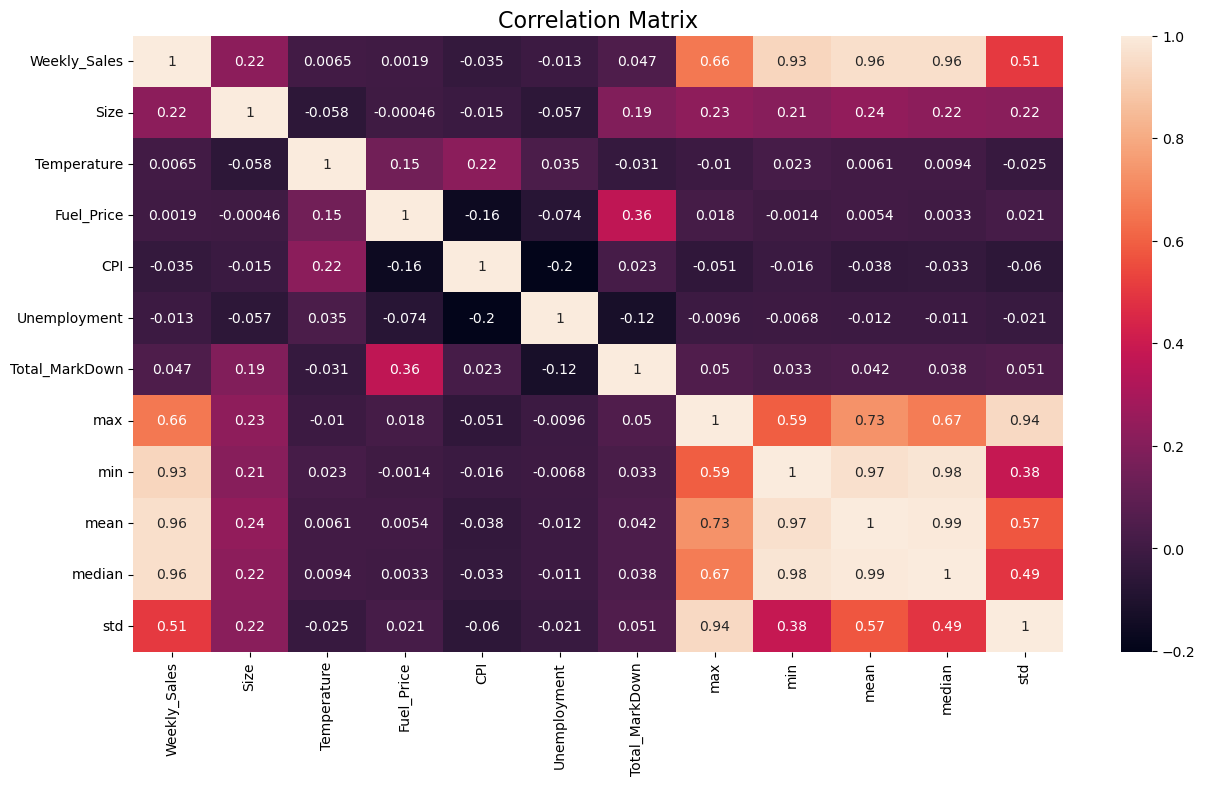

In [44]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# *<ins>Recursive Feature Elimination:</ins>*

Recursive feature elimination (RFE) is used to select the most important features for the model. By fitting a RandomForestRegressor, features are ranked based on their importance, and the top features are selected for further analysis. This step reduces the dimensionality of the dataset, enhancing model performance and interpretability.

Defines a variable feature_col containing all column names in the DataFrame data except for 'Weekly_Sales'.

In [45]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

Initializes a Random Forest Regressor model with out-of-bag estimation enabled and 23 decision trees.<br>
Trains the Random Forest Regressor model using features from feature_col and the target variable 'Weekly_Sales'.

In [46]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

Calculates the indices of feature importances in descending order.<br>
Creates an empty DataFrame with columns for feature rank, feature name, and importance.<br>
Initiates a loop over the number of features in feature_col.<br>
Populates the feature_rank DataFrame with feature ranks, names, and their corresponding importances.

In [47]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,5.176371e-01
1,2,median,4.104390e-01
2,3,Week,1.981425e-02
3,4,Temperature,8.801400e-03
4,5,max,6.014780e-03
...,...,...,...
139,140,Dept_51,2.747827e-10
140,141,Dept_45,2.438276e-10
141,142,Dept_78,2.275764e-12
142,143,Dept_39,2.703825e-14


Selects the top 23 features based on importance.
Converts the selected features into a list.

In [48]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_9', 'Dept_1', 'Dept_11', 'Year', 'Dept_5', 'Dept_56']


Creates a DataFrame X containing only the selected features.
Creates a Series Y containing the target variable 'Weekly_Sales'.

In [49]:
X = data[x]
Y = data['Weekly_Sales']

Concatenates the feature DataFrame X and the target variable Series Y along the columns to form the new DataFrame data.

In [50]:
data = pd.concat([X,Y],axis=1)
data

,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Dept_9,Dept_1,Dept_11,Year,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,0,0.630267,0,1,0,2010,0,0,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,0,0.492338,0,0,0,2010,0,0,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,0,0.492338,0,0,0,2010,0,0,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,0,0.650636,0,0,0,2010,0,0,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,0,0.492338,0,0,0,2010,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,0,0.906277,0,0,0,2012,0,0,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,0,0.026063,0,0,0,2012,0,0,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,0,0.916437,0,0,0,2012,0,0,0.073391


In [51]:
data.to_csv('C:/Users/moham/Desktop/dataset/final_data.csv')

# *<ins>Data Splitted into Training, Validation, Test:</ins>*

The dataset is split into training and testing sets using train_test_split from sklearn. This step ensures that the model is evaluated on unseen data, providing an unbiased estimate of model performance. The split is done in a stratified manner to maintain the distribution of the target variable.

In [52]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# *<ins>Linear Regression Model:</ins>*

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)
print("----------------------------------------------------")
y_pred = lr.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
print("----------------------------------------------------")
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

Linear Regressor Accuracy -  92.28079698115756
----------------------------------------------------
MAE 0.03005771492151465
MSE 0.0034851431916206586
RMSE 0.05903510135182846
R2 0.9228079866096734
----------------------------------------------------


,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


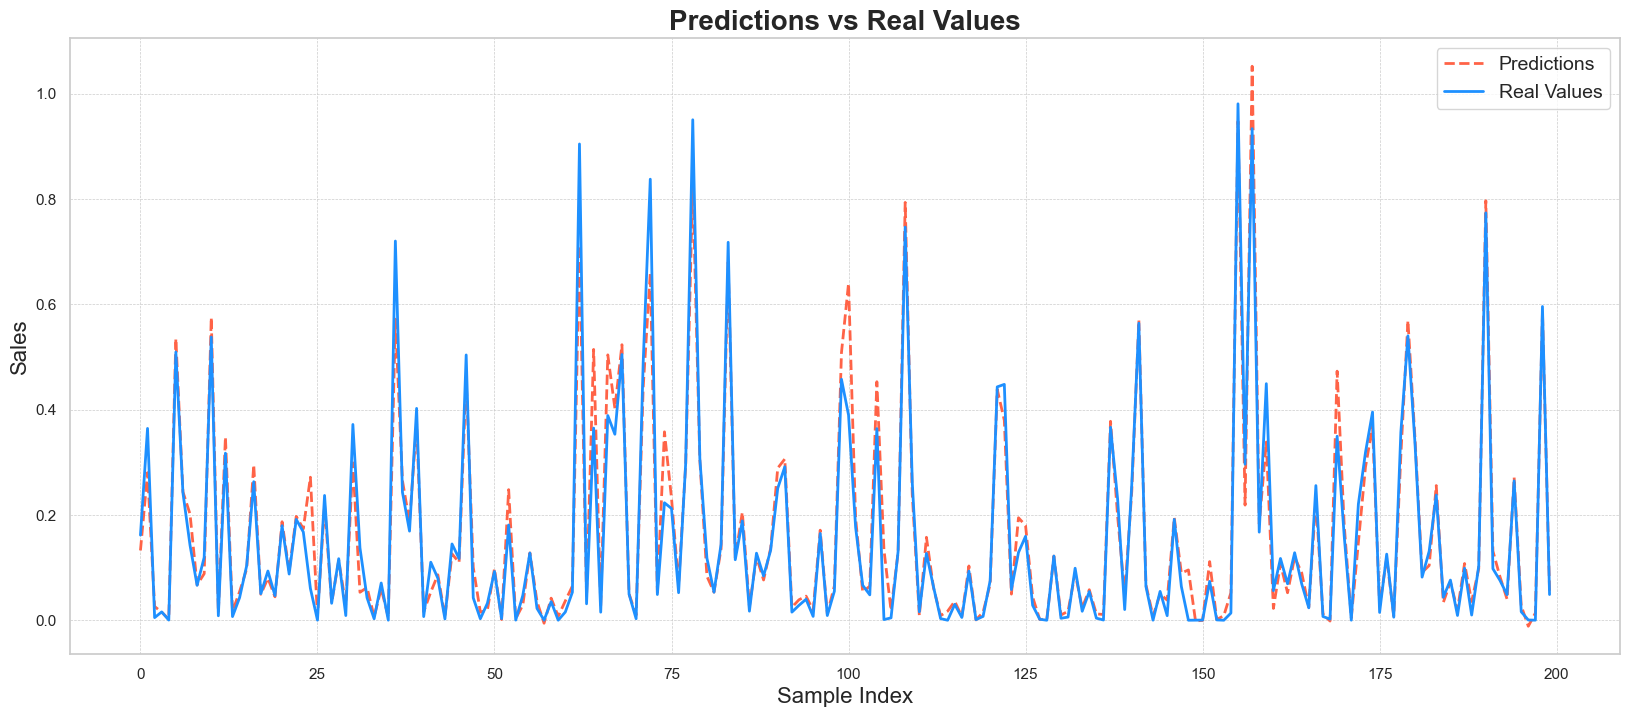

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[:200].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# *<ins>XGboost Model:</ins>*

An XGBoost model is trained on the selected features. XGBoost is a powerful boosting algorithm known for its efficiency and performance on structured data. The model is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) to assess its predictive accuracy.

In [57]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

y_pred = xgbr.predict(X_test)
print("----------------------------------------------------")
print("MAE = " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE = " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE = " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 = " , metrics.explained_variance_score(y_test, y_pred))
print("----------------------------------------------------")
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

XGBoost Regressor Accuracy -  97.30122568962145
----------------------------------------------------
MAE =  0.019802650555444917
MSE =  0.0012184696905338107
RMSE =  0.034906585202993015
R2 =  0.973012533919636
----------------------------------------------------


,Actual,Predicted
Date,,
2011-08-05,0.161661,0.128253
2010-07-09,0.364278,0.309000
2011-07-01,0.005003,0.018648
2012-01-06,0.015856,0.020477
2011-08-26,0.000318,0.000478
...,...,...
2011-01-28,0.169068,0.220189
2010-08-20,0.252860,0.244801
2010-11-26,0.265617,0.382784


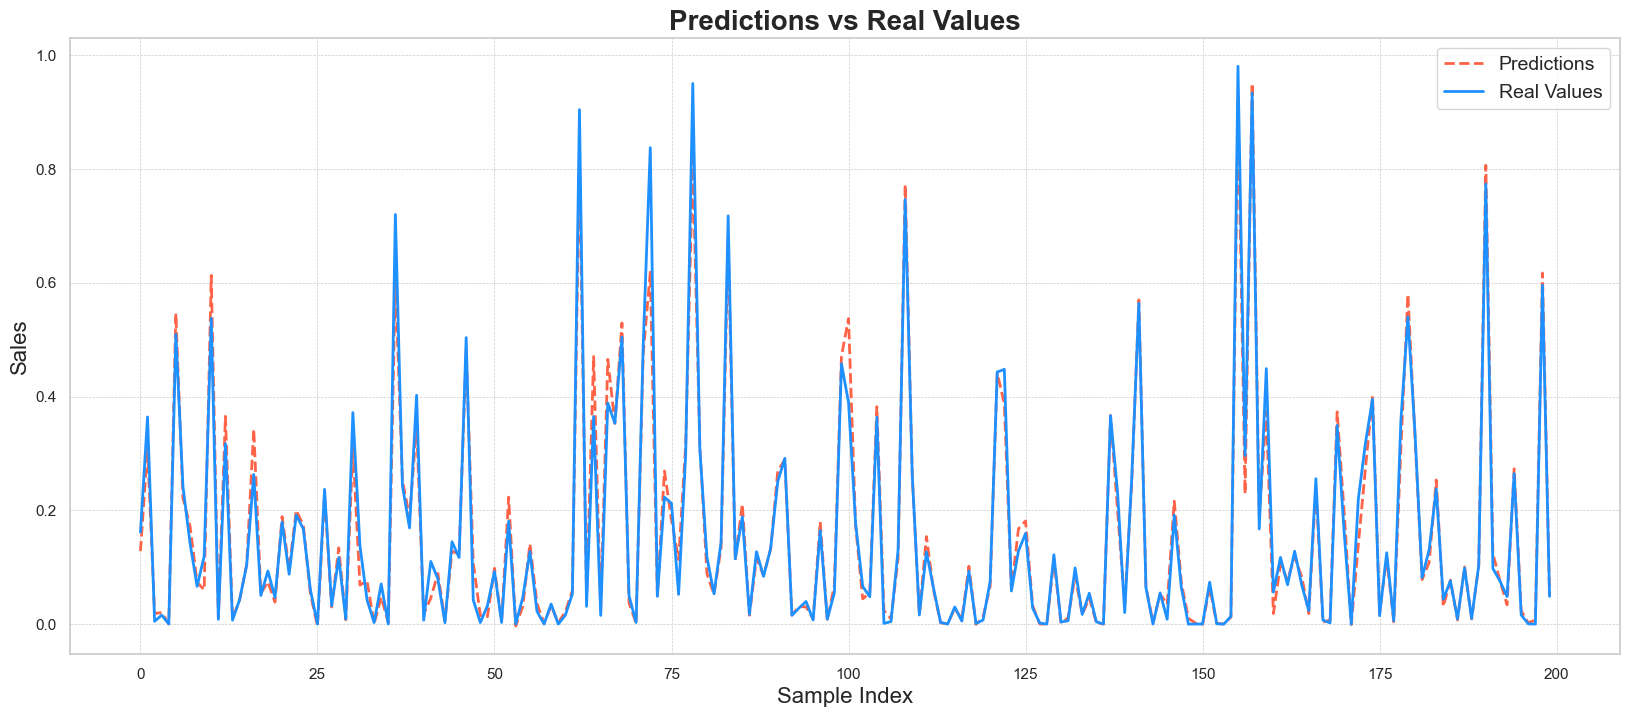

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[:200].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# *<ins>Custom Deep Learning Neural Network:</ins>*

A custom deep learning neural network is defined using Keras. The network consists of multiple dense layers with ReLU activation functions, designed to capture complex patterns in the data. The model is trained and evaluated, with training history plotted to visualize the learning process. This deep learning approach provides an alternative to traditional machine learning models, potentially capturing non-linear relationships more effectively.

Initializes a sequential neural network model.<br>
Adds a fully connected layer with 64 neurons, using ReLU activation function, to the model, with input dimensions determined by the number of features in the training data.<br>
Adds another fully connected layer with 32 neurons to the model.<br>
Adds an output layer with 1 neuron to the model for regression tasks.<br>
Compiles the model using mean absolute error as the loss function and the Adam optimizer.<br>
Returns the compiled neural network model.

In [71]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

Initializes the neural network model using the function create_model().

In [72]:
estimator_model = create_model()

C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trains the neural network model using training data X_train and y_train, with a validation split of 20%, over 100 epochs, with a batch size of 5000, and verbose output mode.

In [73]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000, verbose=1)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3595 - val_loss: 0.1654
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1841 - val_loss: 0.1489
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1780 - val_loss: 0.1386
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1781 - val_loss: 0.1342
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1754 - val_loss: 0.1306
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1717 - val_loss: 0.1273
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1675 - val_loss: 0.1239
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1634 - val_loss: 0.1206
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1617 - val_loss: 0.1186
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1584 - val_loss: 0.1140
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1542 - val_loss: 0.1128
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

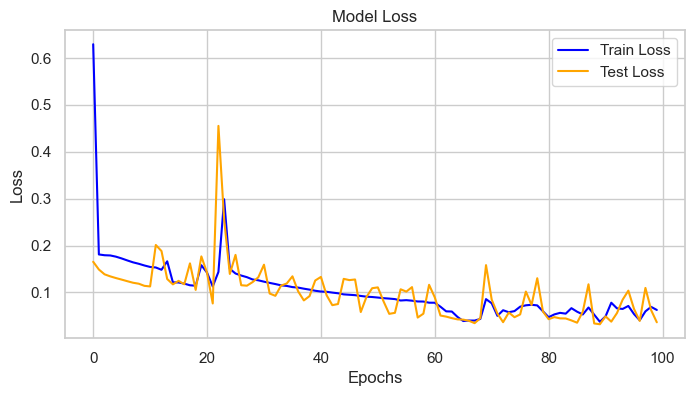

In [74]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [75]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)
print("--------------------------------------------")
y_pred = estimator_model.predict(X_test)
y_pred = np.ravel(y_pred)
print("--------------------------------------------")
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
print("--------------------------------------------")
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df

Deep Neural Network accuracy -  97.19767802127353
--------------------------------------------
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step
--------------------------------------------
MAE 0.03612779221529733
MSE 0.003989016283506158
RMSE 0.06315865960821333
R2 0.9117277567652067
--------------------------------------------


,Actual,Predicted
Date,,
2011-08-05,0.161661,0.133030
2010-07-09,0.364278,0.284710
2011-07-01,0.005003,0.042477
2012-01-06,0.015856,0.025900
2011-08-26,0.000318,0.020421
...,...,...
2011-01-28,0.169068,0.225105
2010-08-20,0.252860,0.236544
2010-11-26,0.265617,0.337643


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


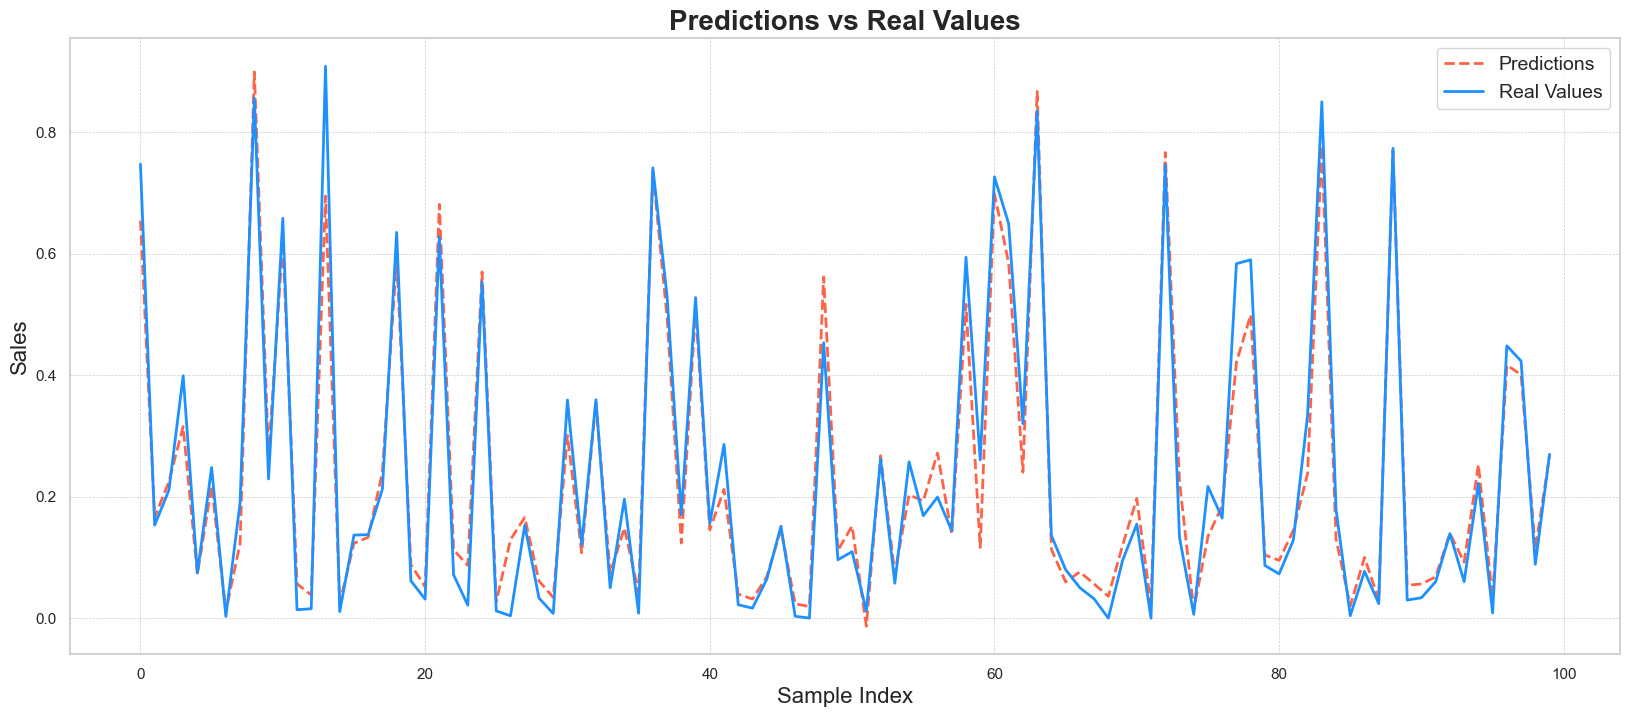

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[200:300].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

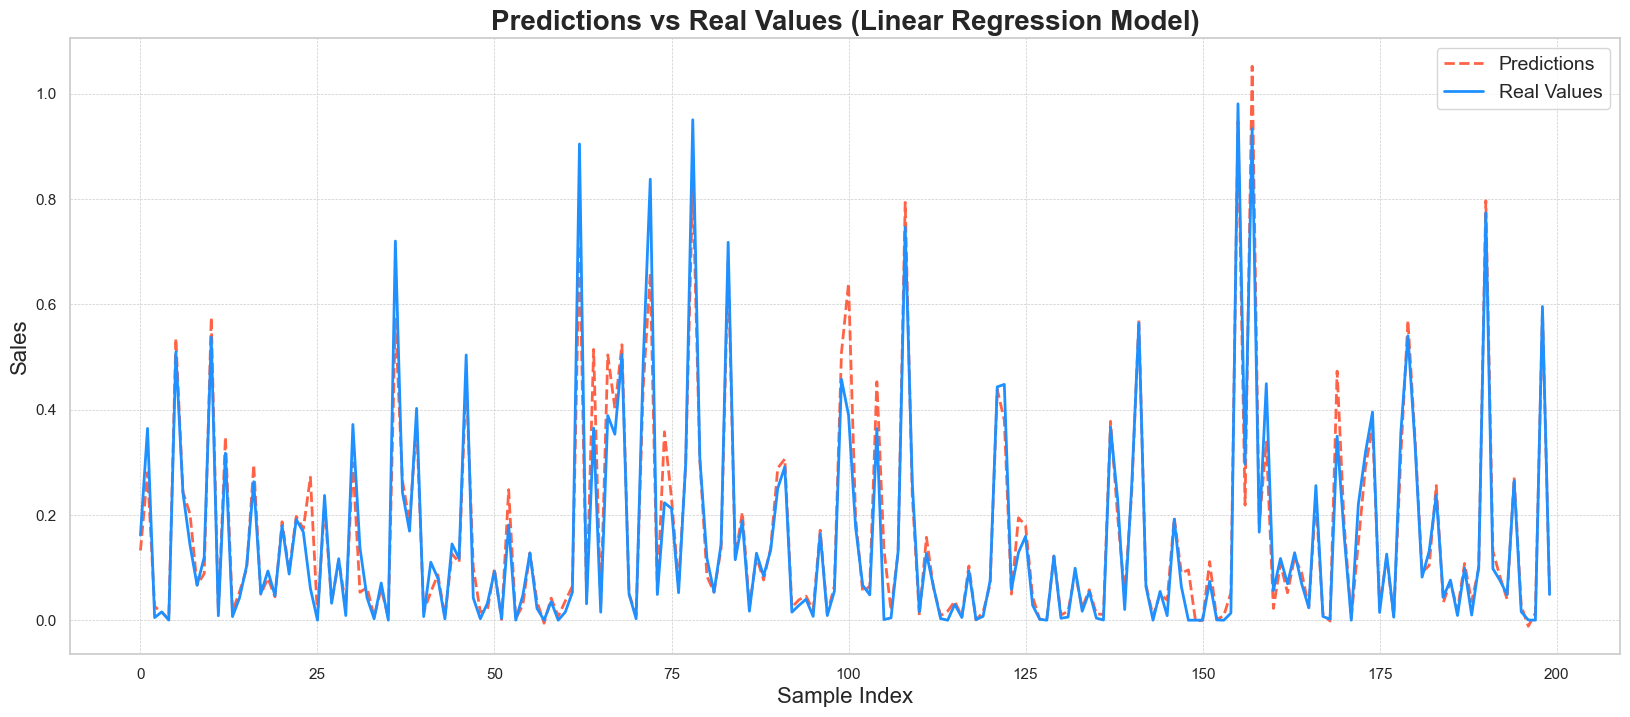

MAE 0.03005771492151465
MSE 0.0034851431916206586
RMSE 0.05903510135182846
R2 0.9228079866096734


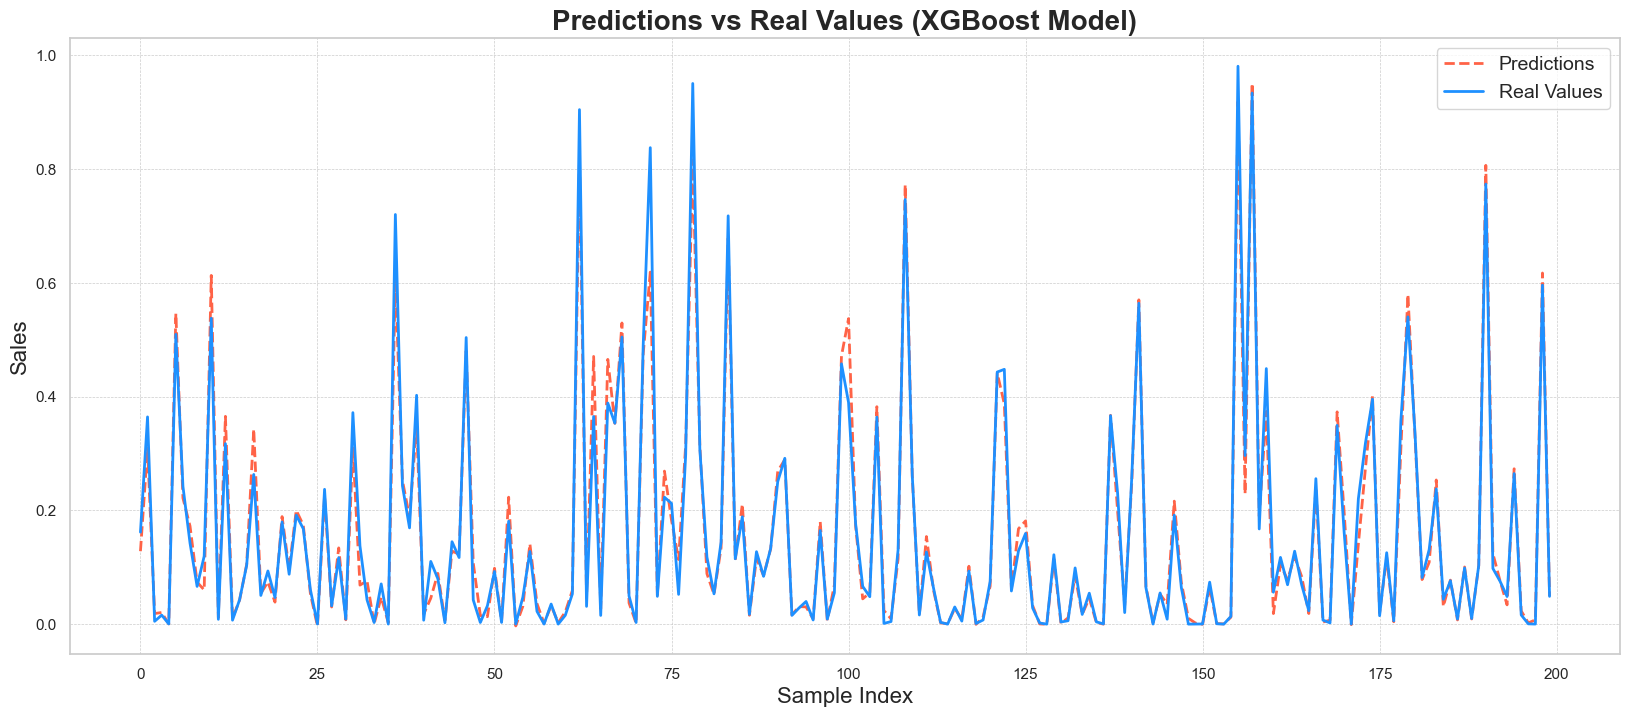

MAE =  0.019802650555444917
MSE =  0.0012184696905338107
RMSE =  0.034906585202993015
R2 =  0.973012533919636
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


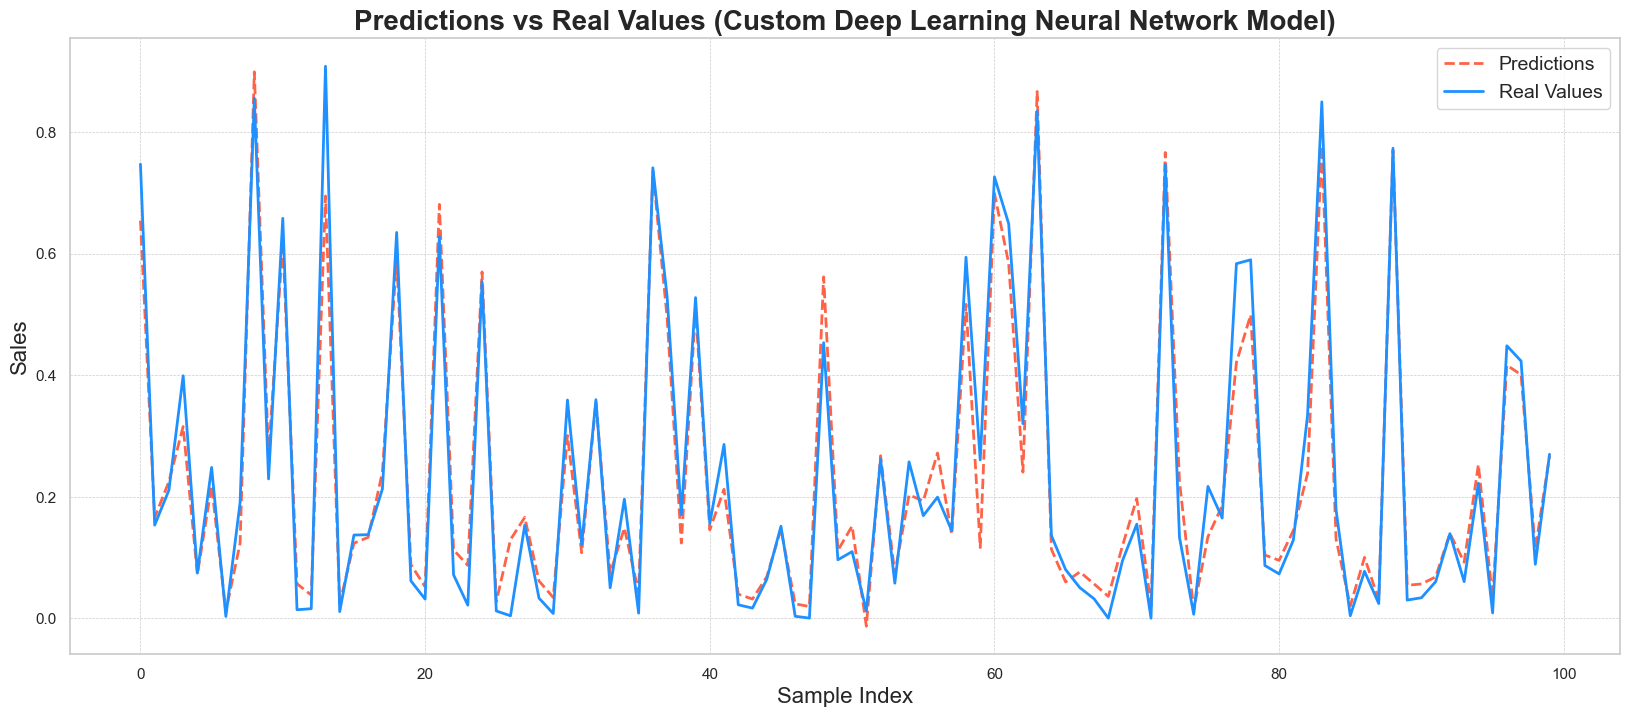

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MAE 0.03612779221529733
MSE 0.003989016283506158
RMSE 0.06315865960821333
R2 0.9117277567652067


In [77]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[:200].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values (Linear Regression Model)', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

y_pred = lr.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
#----------------------------------------------------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[:200].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values (XGBoost Model)', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

y_pred = xgbr.predict(X_test)
print("MAE = " , metrics.mean_absolute_error(y_test, y_pred))
print("MSE = " , metrics.mean_squared_error(y_test, y_pred))
print("RMSE = " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 = " , metrics.explained_variance_score(y_test, y_pred))
#----------------------------------------------------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="Predictions", linewidth=2.0, color='#FF6347', linestyle='--')
plt.plot(y_test[200:300].values, label="Real Values", linewidth=2.0, color='#1E90FF', linestyle='-')
plt.title('Predictions vs Real Values (Custom Deep Learning Neural Network Model)', fontsize=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

y_pred = estimator_model.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))